<a href="https://colab.research.google.com/github/Saon163/2023_CNN_project/blob/master/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread             # 이미지를 읽어 들인다
from skimage.transform import resize      # 이미지의 크기를 변경할 수 있다

In [ ]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/faces/'

face_images = []

for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64,64))
    face_images.append(img)

<Figure size 432x288 with 0 Axes>

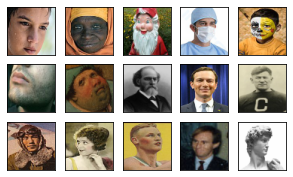

In [ ]:
def plot_images(nRow, nCol, img):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:         axis = ax[i, j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j])

plot_images(3,5, face_images)

<Figure size 432x288 with 0 Axes>

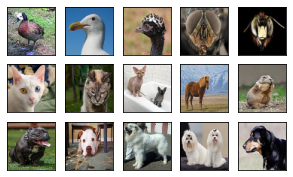

In [ ]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/animals/'

animal_images = []

for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64,64))
    animal_images.append(img)

plot_images(3,5, animal_images)

In [ ]:
X =face_images + animal_images
y = [ [1,0] ]* len(face_images) + [ [0,1]] * len(animal_images)
X = np.array(X)
y = np.array(y)
print(X.shape, y.shape)

(30, 64, 64, 3) (30, 2)


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

model = keras.models.Sequential( [
    keras.layers.Conv2D(input_shape = (64, 64, 3), 
                        kernel_size = (3,3), filters = 32),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(kernel_size = (3,3), filters = 32),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(kernel_size = (3,3), filters = 32),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(kernel_size = (3,3), filters = 32),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dense(2, activation = 'softmax'),
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X, y, epochs = 50)

Epoch 1/50
1/1 [==============================] - 12s 12s/step - loss: 0.6798 - accuracy: 0.6000
Epoch 2/50
1/1 [==============================] - 0s 15ms/step - loss: 0.7230 - accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6624 - accuracy: 0.5667
Epoch 4/50
1/1 [==============================] - 0s 14ms/step - loss: 0.6491 - accuracy: 0.5667
Epoch 5/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6312 - accuracy: 0.7667
Epoch 6/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6121 - accuracy: 0.7000
Epoch 7/50
1/1 [==============================] - 0s 14ms/step - loss: 0.5946 - accuracy: 0.7333
Epoch 8/50
1/1 [==============================] - 0s 18ms/step - loss: 0.5587 - accuracy: 0.7667
Epoch 9/50
1/1 [==============================] - 0s 13ms/step - loss: 0.5243 - accuracy: 0.8333
Epoch 10/50
1/1 [==============================] - 0s 14ms/step - loss: 0.4945 - accuracy: 0.8000
Epoch 11/50
1/1 [============

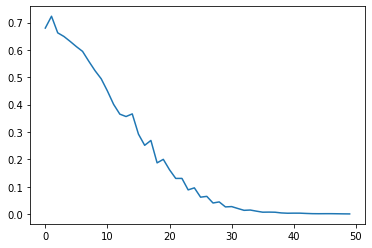

In [ ]:
plt.plot(history.history['loss'])

1/1 [==============================] - 0s 22ms/step


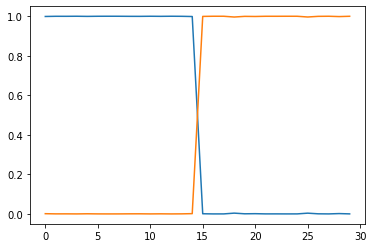

In [ ]:
yhat = model.predict(X)
plt.plot(yhat)

<Figure size 432x288 with 0 Axes>

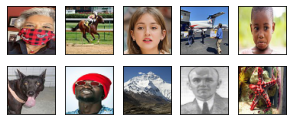

In [ ]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/test_data/'

test_images = []

for i in range(10):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64,64))
    test_images.append(img)

test_images = np.array(test_images)
plot_images(2, 5, test_images)

1/1 [==============================] - 0s 35ms/step


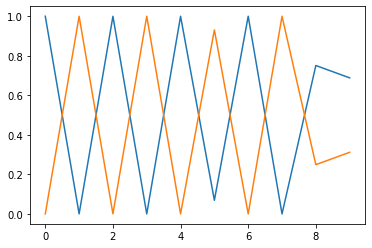

In [ ]:
test_result = model.predict(test_images)
plt.plot(test_result)

<Figure size 432x288 with 0 Axes>

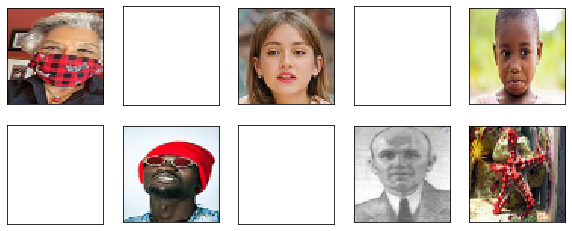

In [ ]:
fig = plt.figure()
fig, ax = plt.subplots(2,5, figsize = (10,4))
for i in range(2):
    for j in range(5):
        ax[i, j].get_xaxis().set_visible(False)
        ax[i, j].get_yaxis().set_visible(False)
        if test_result[i*5+j][0] > 0.5:
            ax[i, j].imshow(test_images[i*5+j],interpolation='nearest')